##### Importing the libs

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [3]:
personal_loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
personal_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Inspecting the data

###### Checking demensions

In [4]:
personal_loan.shape

(5000, 14)

###### Statistical aspects

In [5]:
personal_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
personal_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


###### Checking the null values

In [7]:
personal_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
personal_loan = personal_loan.drop(['ID'],axis = 1)

###### Looking correlations

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

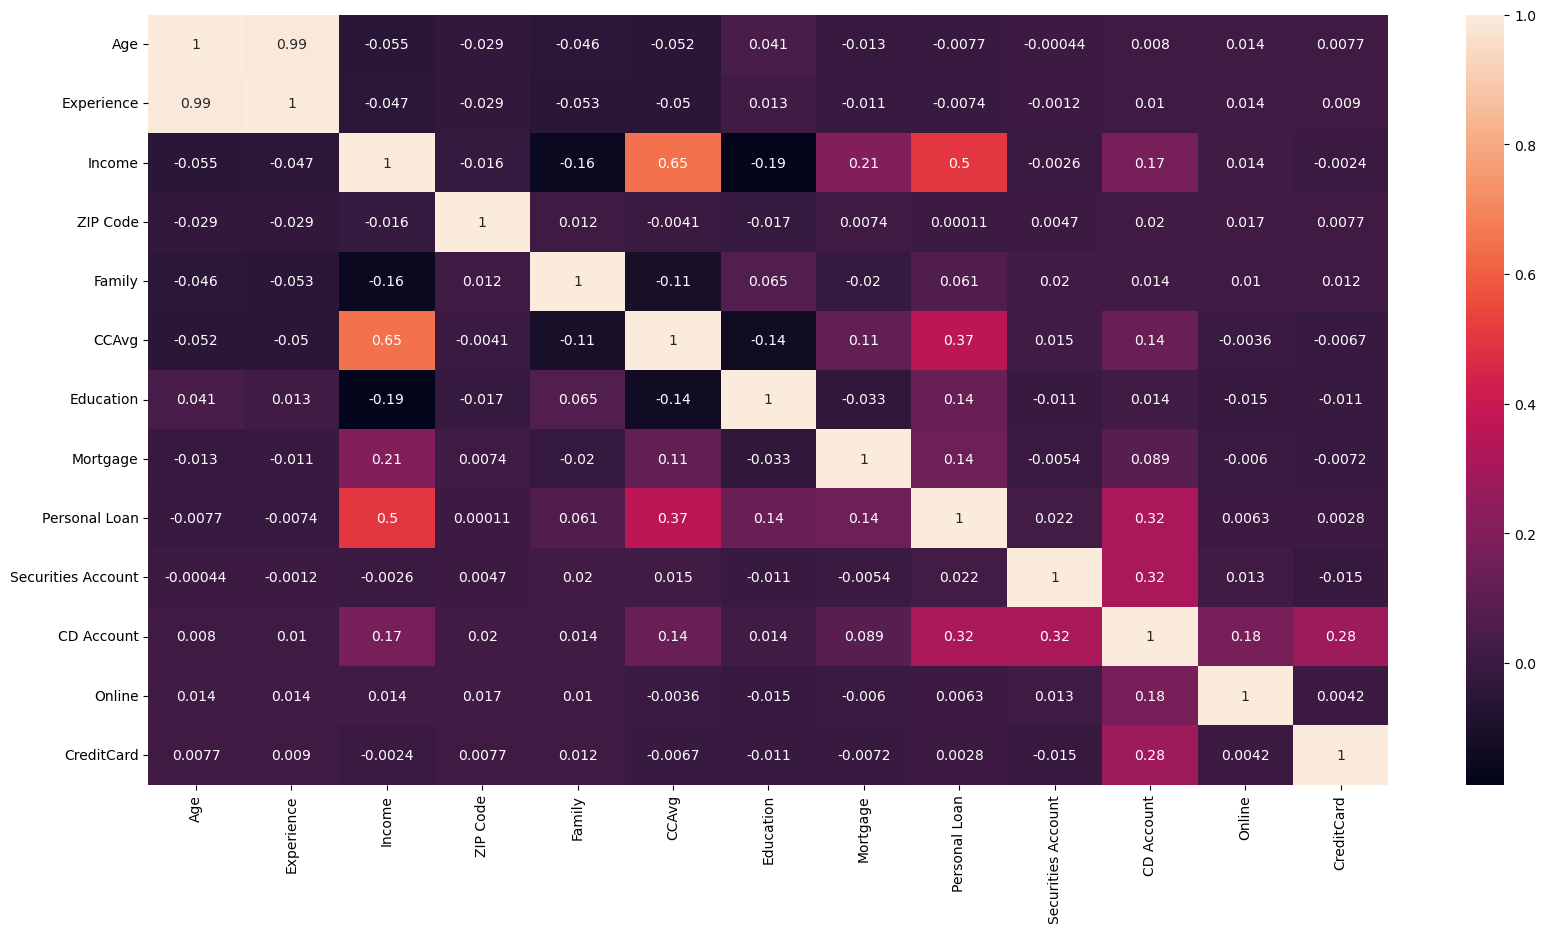

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(personal_loan.corr(), annot = True)
plt.show()

###### Distribution of data

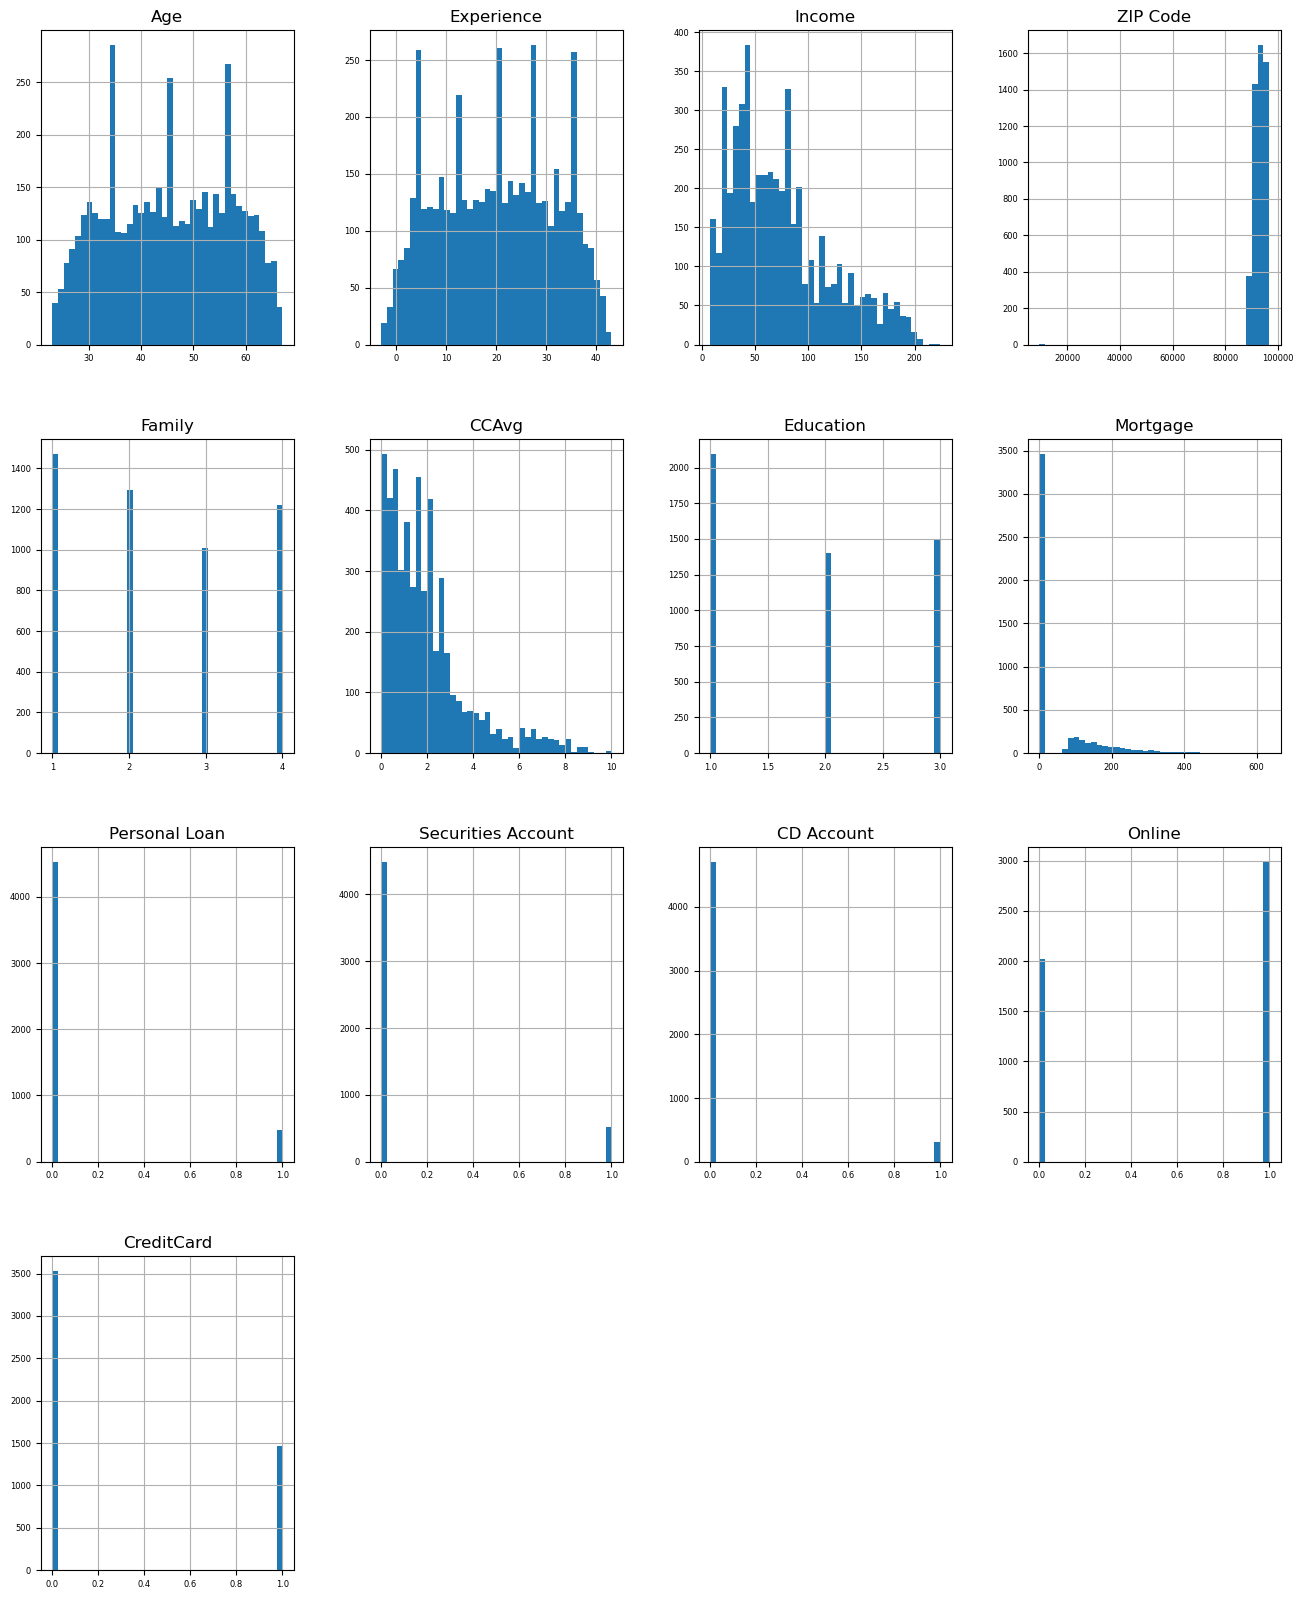

In [11]:
personal_loan.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

###### Updating the names of some features

In [12]:
personal_loan.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

###### Getting the regions of the customers from the zipcode

In [13]:
import zipcodes as zcode

In [14]:
personal_loan.ZIPCode.nunique()

467

In [15]:
# getting the unique zipcode

list_zipcode = personal_loan.ZIPCode.unique()

In [16]:
dict_zip = {}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county) == 1:
        county = my_city_county[0].get('county')
    else:
        county = zipcode
        
    dict_zip.update({zipcode:county})

In [17]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [18]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [19]:
personal_loan['County'] = personal_loan['ZIPCode'].map(dict_zip)

In [20]:
personal_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  County             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


###### I have observed that some of the experience are in negative should fix that

In [21]:
personal_loan[personal_loan['Experience']<0].sort_values(by ='Experience',ascending = True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County
4514,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0,Los Angeles County


By the observation of the above output can say that by mistake the experiences are in negative, comparing to the age can say it should be in positive

In [22]:
personal_loan.loc[personal_loan['Experience']<0,'Experience'] = np.abs(personal_loan['Experience'])

In [23]:
personal_loan.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [24]:
personal_loan = personal_loan.drop(['County'],axis = 1)

### Exploratory data analysis

performed in tableau env

###### As observed in the corr visual age and experince as highly correlated

In [25]:
personal_loan = personal_loan.drop(['Age'],axis = 1)

### Splitting the dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = personal_loan.drop(columns=['PersonalLoan'])  
y = personal_loan['PersonalLoan']  

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistice reg using sklearn

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 

In [31]:
accuracy = model.score(X_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.909


accuracy is showing good in the first go itself let's see the which factors are affecting the target variable by performing statsmodel

### Logistic regression using statsmodel

In [32]:
import statsmodels.api as sm

In [33]:
X_train = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 4000
Model:                            GLM   Df Residuals:                     3988
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -521.24
Date:                Tue, 07 May 2024   Deviance:                       1042.5
Time:                        12:18:28   Pearson chi2:                 5.84e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3035
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.3810      2.973     -3.155      0.002     -15.208      -3.554
Experience            0.0114      0.007      1.576      0.115      -0.003       0.026
Income                0.0533      0.003     18.658      0.000       0.048       0.059
ZIPCode           -4.133e-05   3.15e-05     -1.313      0.189      -0.000    2.04e-05
Family                0.7310      0.083      8.839      0.000       0.569       0.893
CCAvg                 0.1052      0.044      2.388      0.017       0.019       0.192
Education             1.6238      0.123     13.190      0.000       1.382       1.865
Mortgage              0.0005      0.001      0.838      0.402      -0.001       0.002
SecuritiesAccount    -0.8921      0.314     -2.841      0.004      -1.508      -0.277
CDAccount             3.8536      0.359     10.727      0.000       3.149       4.558
Online               -0.6318      0.175     -3.611      0.000      -0.975      -0.289
CreditCard           -1.2509      0.229     -5.454      0.000      -1.700      -0.801
=====================================================================================
"""

###### Getting predicted values on the train set

In [34]:
y_train_pred = res.predict(X_train)
y_train_pred[:10]

4227    0.005227
4676    0.001015
800     0.185317
3671    0.000937
4193    0.000326
2968    0.633968
4793    0.000814
4368    0.002581
2776    0.030071
2970    0.277740
dtype: float64

In [35]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([5.22741180e-03, 1.01482137e-03, 1.85317373e-01, 9.36984499e-04,
       3.26446244e-04, 6.33967639e-01, 8.13889401e-04, 2.58089214e-03,
       3.00706904e-02, 2.77739946e-01])

###### Creating a dataframe with actual personal loan and the predicted probabilities

In [36]:
y_train_pred_final = pd.DataFrame({'PersonalLoan':y_train.values,'PersonalLoan_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,PersonalLoan,PersonalLoan_prob,ID
0,0,0.005227,4227
1,0,0.001015,4676
2,0,0.185317,800
3,0,0.000937,3671
4,0,0.000326,4193


###### Creating the column 'predicted' with prob>0.5 as 1

In [37]:
y_train_pred_final['predicted'] = y_train_pred_final.PersonalLoan_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,PersonalLoan,PersonalLoan_prob,ID,predicted
0,0,0.005227,4227,0
1,0,0.001015,4676,0
2,0,0.185317,800,0
3,0,0.000937,3671,0
4,0,0.000326,4193,0


###### Confusion matrix

In [38]:
from sklearn import metrics

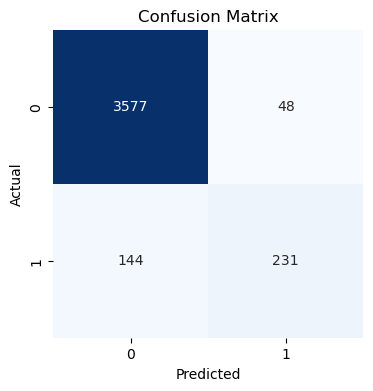

In [39]:
confusion = metrics.confusion_matrix(y_train_pred_final.PersonalLoan,y_train_pred_final.predicted)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding labels, title, and adjusting layout
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(metrics.accuracy_score(y_train_pred_final.PersonalLoan,y_train_pred_final.predicted))

0.952


###### Checking VIFs

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1811.65
2,Income,1.85
5,CCAvg,1.71
9,CDAccount,1.33
8,SecuritiesAccount,1.14
11,CreditCard,1.10
7,Mortgage,1.06
6,Education,1.05
4,Family,1.04
10,Online,1.04


#### Metrics beyond accuracy

In [43]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

###### Sensitivity

In [44]:
TP/float(TP+FN)

0.616

###### Specificity

In [45]:
TN/float(TN+FP)

0.9867586206896551

###### False positive rate

In [46]:
print(FP/float(TN+FP))

0.013241379310344827


###### Positive predictive value

In [47]:
print(TP/float(TP+FP))

0.8279569892473119


###### Negative predictive value

In [48]:
print(TN/float(TN+FN))

0.9613007256113948


###### Overall the model performance is too good check the plotting the ROC curve and optimal cutoff point

In [49]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.PersonalLoan,y_train_pred_final.PersonalLoan_prob, drop_intermediate = False )

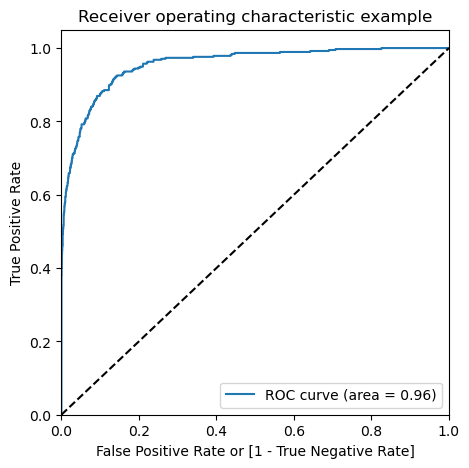

In [51]:
draw_roc(y_train_pred_final.PersonalLoan,y_train_pred_final.PersonalLoan_prob)

###### An Roc curve with an area under the curve of 0.96 indicates a very strong model performance

#### Precision and Recall

In [52]:
from sklearn.metrics import precision_score, recall_score

In [53]:
precision_score(y_train_pred_final.PersonalLoan,y_train_pred_final.predicted)

0.8279569892473119

In [54]:
recall_score(y_train_pred_final.PersonalLoan,y_train_pred_final.predicted)

0.616

### Making predictions on the test set

In [55]:
X_test = sm.add_constant(X_test)

###### Making predictions

In [56]:
y_test_pred = res.predict(X_test)
y_test_pred[:10]

1501    0.000170
2586    0.256924
2653    0.022107
1055    0.000121
705     0.001653
106     0.001712
589     0.034784
2468    0.009180
2413    0.009348
1600    0.056909
dtype: float64

In [57]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1501,0.000170
2586,0.256924
2653,0.022107
1055,0.000121
705,0.001653


In [58]:
y_test_df = pd.DataFrame(y_test)

In [59]:
y_test_df['ID'] = y_test_df.index

In [60]:
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [61]:
y_pred_final = pd.concat([y_test_df,y_pred_1], axis = 1)
y_pred_final.head()

,PersonalLoan,ID,0
0,0,1501,0.000170
1,1,2586,0.256924
2,0,2653,0.022107
3,0,1055,0.000121
4,0,705,0.001653


In [62]:
y_pred_final = y_pred_final.rename(columns={0:'Prob'})

In [63]:
y_pred_final['final_predicted'] = y_pred_final.Prob.map(lambda x:1 if x>0.28 else 0)

In [64]:
y_pred_final.head()

,PersonalLoan,ID,Prob,final_predicted
0,0,1501,0.000170,0
1,1,2586,0.256924,0
2,0,2653,0.022107,0
3,0,1055,0.000121,0
4,0,705,0.001653,0


###### Accuracy

In [65]:
metrics.accuracy_score(y_pred_final.PersonalLoan, y_pred_final.final_predicted)

0.948

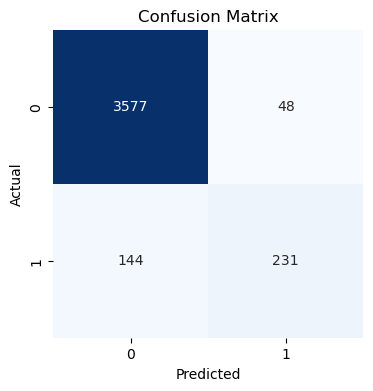

In [67]:
confusion2 = metrics.confusion_matrix(y_pred_final.PersonalLoan,y_pred_final.final_predicted)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding labels, title, and adjusting layout
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###### By seeing the accuracy can say the model is able to generalize effectively to unseen data

In [68]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [76]:
TP / float(TP+FN)

0.819047619047619

In [70]:
# Let us calculate specificity
TN / float(TN+FP)

0.9631284916201117

In [71]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03687150837988827


In [72]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7226890756302521


In [73]:
# Negative predictive value
print (TN / float(TN+ FN))

0.978433598183882


###### Precision and recall

In [74]:
precision_score(y_pred_final.PersonalLoan,y_pred_final.final_predicted)

0.7226890756302521

In [75]:
recall_score(y_pred_final.PersonalLoan,y_pred_final.final_predicted)

0.819047619047619

###### Here the positive predictions are 72% in test it should increase maybe by using the optimal cutoff points and pricision recall tradeoff or the other model like random forests